<a href="https://colab.research.google.com/github/DarshilPadmani/Heart/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Colab/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
df.shape

(1025, 14)

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [32]:
df['target'].value_counts()

,count
target,
1,526
0,499


<ipython-input-33-51ee49967dd7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='hls')


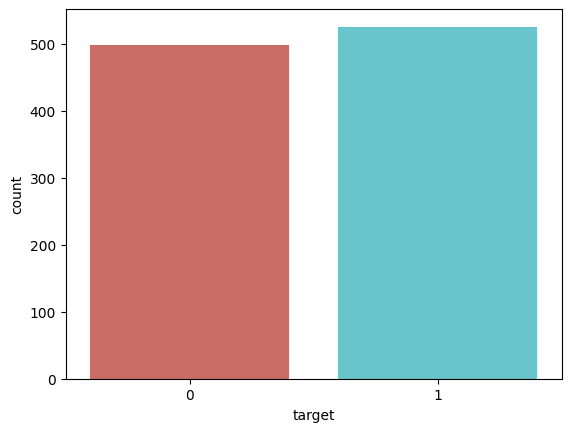

In [33]:
sns.countplot(x='target', data=df, palette='hls')
plt.show()

In [34]:
x = pd.DataFrame(df.iloc[: , :-1])
y = pd.DataFrame(df.iloc[: , -1])

In [35]:
x.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3


In [36]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820, 1), (205, 1))

In [38]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = logmodel.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81 28]
 [11 85]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       109
           1       0.75      0.89      0.81        96

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



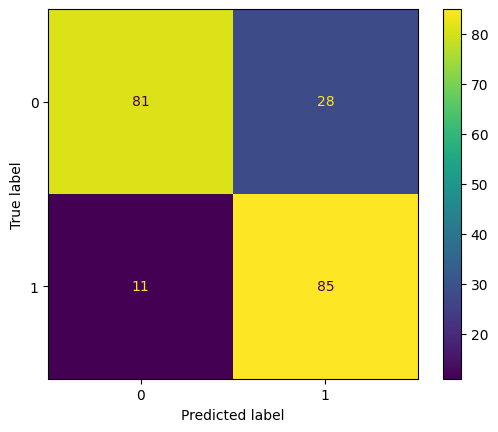

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [45]:
logmodel.predict(x_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0])

In [46]:
probs = logmodel.predict_proba(x_test)
probs

array([[0.9205531 , 0.0794469 ],
       [0.0486684 , 0.9513316 ],
       [0.10973847, 0.89026153],
       [0.20617998, 0.79382002],
       [0.97609754, 0.02390246],
       [0.16407057, 0.83592943],
       [0.2651233 , 0.7348767 ],
       [0.20233408, 0.79766592],
       [0.28514778, 0.71485222],
       [0.55362876, 0.44637124],
       [0.29495522, 0.70504478],
       [0.80871963, 0.19128037],
       [0.06927383, 0.93072617],
       [0.96648881, 0.03351119],
       [0.76035405, 0.23964595],
       [0.35628992, 0.64371008],
       [0.99501816, 0.00498184],
       [0.07409645, 0.92590355],
       [0.95811658, 0.04188342],
       [0.55362876, 0.44637124],
       [0.03984876, 0.96015124],
       [0.9205531 , 0.0794469 ],
       [0.82941864, 0.17058136],
       [0.94721531, 0.05278469],
       [0.29495522, 0.70504478],
       [0.44632608, 0.55367392],
       [0.58658598, 0.41341402],
       [0.15035781, 0.84964219],
       [0.99517032, 0.00482968],
       [0.16535982, 0.83464018],
       [0.

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])

In [49]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00917431, 0.00917431, 0.01834862, 0.01834862,
       0.01834862, 0.01834862, 0.01834862, 0.01834862, 0.02752294,
       0.02752294, 0.04587156, 0.04587156, 0.06422018, 0.06422018,
       0.08256881, 0.08256881, 0.08256881, 0.10091743, 0.10091743,
       0.11926606, 0.11926606, 0.13761468, 0.13761468, 0.14678899,
       0.14678899, 0.14678899, 0.16513761, 0.16513761, 0.17431193,
       0.17431193, 0.18348624, 0.18348624, 0.19266055, 0.21100917,
       0.21100917, 0.24770642, 0.26605505, 0.26605505, 0.28440367,
       0.32110092, 0.32110092, 0.32110092, 0.32110092, 0.33027523,
       0.34862385, 0.34862385, 0.34862385, 0.3853211 , 0.40366972,
       0.41284404, 0.43119266, 0.47706422, 0.51376147, 0.52293578,
       0.52293578, 0.53211009, 0.55963303, 0.56880734, 0.59633028,
       0.62385321, 0.62385321, 0.64220183, 0.75229358, 0.77064

In [50]:
tpr

array([0.        , 0.01041667, 0.125     , 0.14583333, 0.17708333,
       0.19791667, 0.20833333, 0.22916667, 0.23958333, 0.26041667,
       0.35416667, 0.35416667, 0.375     , 0.375     , 0.38541667,
       0.42708333, 0.46875   , 0.51041667, 0.57291667, 0.57291667,
       0.59375   , 0.59375   , 0.61458333, 0.61458333, 0.63541667,
       0.63541667, 0.65625   , 0.66666667, 0.66666667, 0.69791667,
       0.69791667, 0.70833333, 0.70833333, 0.73958333, 0.73958333,
       0.76041667, 0.78125   , 0.78125   , 0.82291667, 0.82291667,
       0.85416667, 0.85416667, 0.875     , 0.875     , 0.875     ,
       0.88541667, 0.88541667, 0.88541667, 0.89583333, 0.89583333,
       0.89583333, 0.90625   , 0.92708333, 0.9375    , 0.9375    ,
       0.9375    , 0.94791667, 0.96875   , 0.96875   , 0.96875   ,
       0.96875   , 0.96875   , 0.96875   , 0.96875   , 0.96875   ,
       0.97916667, 0.97916667, 0.97916667, 0.97916667, 0.97916667,
       0.97916667, 1.        , 1.        , 1.        , 1.     

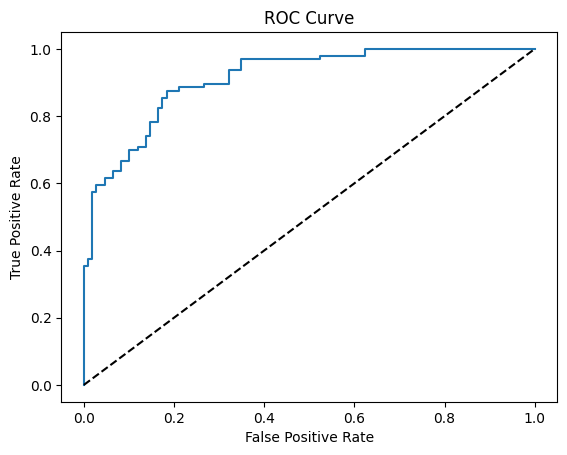

In [55]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
roc_auc_score(y_test, y_pred)

0.8142679663608562